<a href="https://colab.research.google.com/github/anniseraa/fsd/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instalasi library dan import library

In [ ]:
!pip install -q scikit-learn pandas matplotlib seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib inline


Pada bagian ini digunakan beberapa library seperti pandas, numpy, matplotlib, seaborn, dan scikit-learn. Semua library ini membantu mengolah data, membuat grafik, serta membangun dan mengevaluasi model regresi linear

1. Persiapan Data

Dataset ini berisi 15 data dengan 4 fitur, yaitu jam belajar, kehadiran, nilai tugas, dan nilai ujian SJK. Variabel targetnya adalah nilai ujian SJK.

In [ ]:
data = {
    'jam belajar': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 8, 6, 5, 9],
    'kehadiran': [60, 65, 70, 75, 78, 82, 85, 88, 90, 93, 95, 87, 80, 76, 91],
    'nilai tugas': [55, 60, 62, 67, 70, 75, 78, 80, 85, 88, 90, 82, 74, 68, 86],
    'nilai ujian SJK': [58, 62, 65, 69, 72, 76, 80, 83, 87, 90, 92, 81, 75, 70, 85]
}

df = pd.DataFrame(data)
df

,jam belajar,kehadiran,nilai tugas,nilai ujian SJK
0,2,60,55,58
1,3,65,60,62
2,4,70,62,65
3,5,75,67,69
4,6,78,70,72
5,7,82,75,76
6,8,85,78,80
7,9,88,80,83
8,10,90,85,87
9,11,93,88,90


Dataset dibuat manual berisi data jam belajar, kehadiran, nilai tugas, dan nilai ujian SJK dari 15 mahasiswa. Data ini digunakan untuk mencari hubungan antara kebiasaan belajar dengan hasil ujian

2. Eksplorasi Data

Beberapa baris pertama dataset:
   jam belajar  kehadiran  nilai tugas  nilai ujian SJK
0            2         60           55               58
1            3         65           60               62
2            4         70           62               65
3            5         75           67               69
4            6         78           70               72


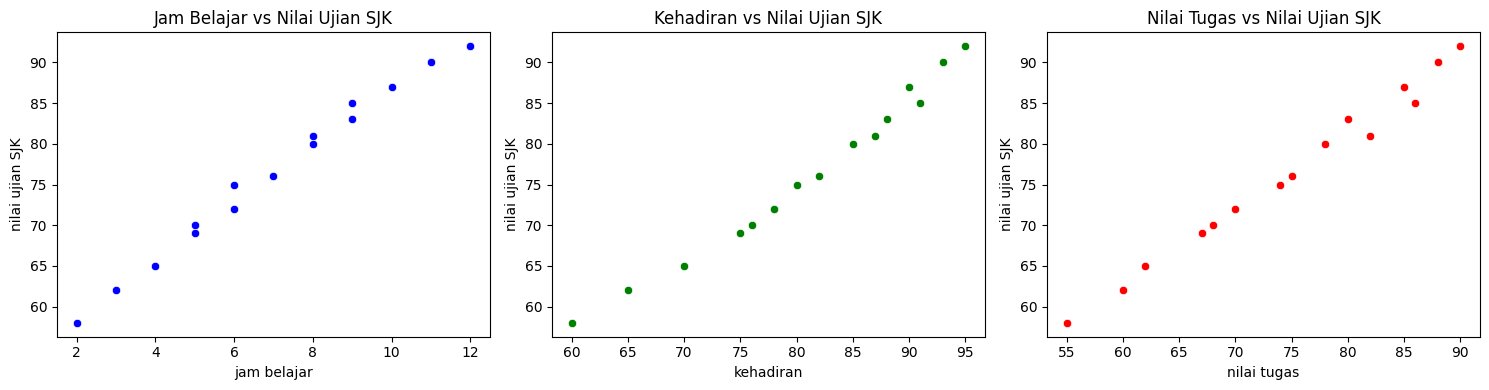

In [ ]:
# Tampilkan beberapa baris pertama data
print("Beberapa baris pertama dataset:")
print(df.head())

# Membuat visualisasi hubungan antara variabel independen dan dependen
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.scatterplot(x='jam belajar', y='nilai ujian SJK', data=df, color='blue')
plt.title('Jam Belajar vs Nilai Ujian SJK')

plt.subplot(1, 3, 2)
sns.scatterplot(x='kehadiran', y='nilai ujian SJK', data=df, color='green')
plt.title('Kehadiran vs Nilai Ujian SJK')

plt.subplot(1, 3, 3)
sns.scatterplot(x='nilai tugas', y='nilai ujian SJK', data=df, color='red')
plt.title('Nilai Tugas vs Nilai Ujian SJK')

plt.tight_layout()
plt.show()

Scatter plot dibuat untuk melihat hubungan antara jam belajar, kehadiran, dan nilai tugas terhadap nilai ujian SJK. Terlihat bahwa semakin rajin belajar dan hadir, nilai ujian juga meningkat

3. Pembangunan Model

In [ ]:
X = df[['jam belajar', 'kehadiran', 'nilai tugas']]   # variable input
y = df['nilai ujian SJK']                             # variable target

# Pisahkan data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model regresi linear
model = LinearRegression()

# Latih model dengan data training
model.fit(X_train, y_train)


LinearRegression()

Data dibagi menjadi dua bagian, yaitu data latih (train) dan data uji (test). Model Linear Regression dibuat lalu dilatih dengan data train supaya bisa mempelajari pola hubungan antara faktor belajar dengan nilai ujian

4. Evaluasi Model

In [ ]:
# Prediksi pada data testing
y_pred = model.predict(X_test)

for pred, actual in zip(y_pred, y_test):
    print(f"Prediksi: {pred:.2f} | Aktual: {actual}")

# Menampilkan nilai koefisien regresi (slope) dan intercept
print("Koefisien regresi:", model.coef_)
print("Intercept:", model.intercept_)

# Menghitung dan menampilkan R2 Score dan Mean Squared Error (MSE)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R2 Score:", r2)
print("Mean Squared Error (MSE):", mse)

Prediksi: 89.67 | Aktual: 90
Prediksi: 81.74 | Aktual: 81
Prediksi: 57.74 | Aktual: 58
Koefisien regresi: [1.56322857 0.10432345 0.43691899]
Intercept: 24.327578574590497
R2 Score: 0.9986876056660744
Mean Squared Error (MSE): 0.2382724824038264


Model yang sudah dilatih kemudian digunakan untuk memprediksi nilai ujian pada data test. Hasil prediksi dibandingkan dengan nilai asli, lalu diukur menggunakan R² dan MSE untuk mengetahui seberapa akurat model

5. Visualisasi Hasil

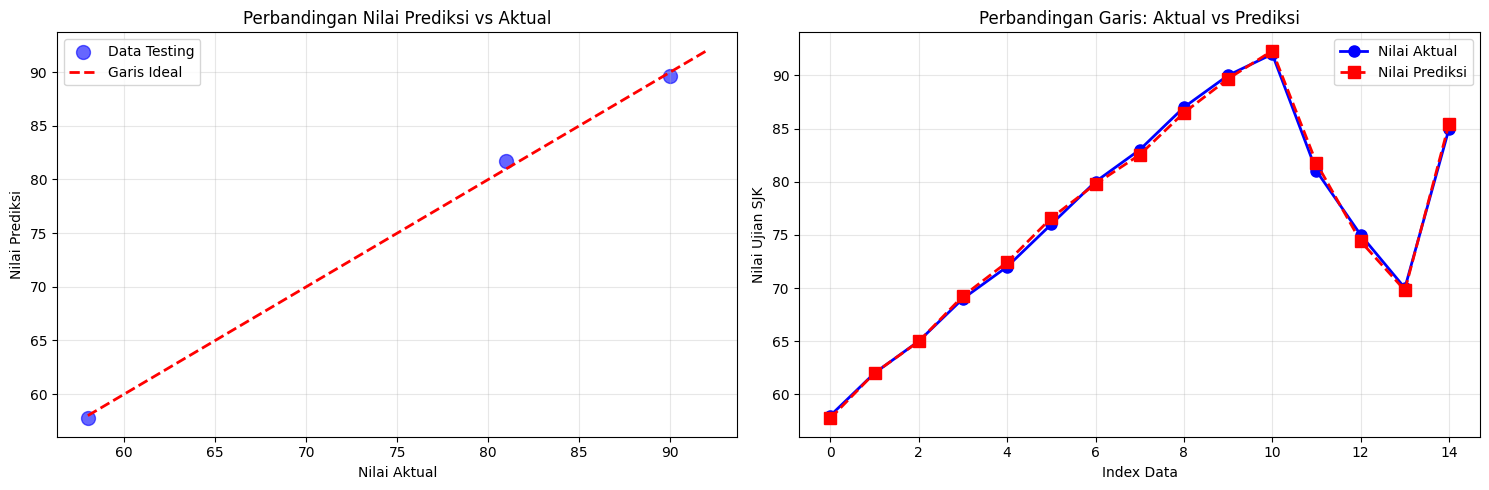

In [ ]:
# Membandingkan hasil prediksi dengan nilai aktual(Scatter Plot)
y_pred_all = model.predict(X)
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color='blue', s=100, alpha=0.6, label='Data Testing')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Garis Ideal')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Perbandingan Nilai Prediksi vs Aktual')
plt.legend()
plt.grid(True, alpha=0.3)

# Menampilkan plot garis regresi dan titik data aktual(Line Plot)
plt.subplot(1, 2, 2)
indices = range(len(y))
plt.plot(indices, y.values, 'o-', color='blue', label='Nilai Aktual', markersize=8, linewidth=2)
plt.plot(indices, y_pred_all, 's--', color='red', label='Nilai Prediksi', markersize=8, linewidth=2)
plt.xlabel('Index Data')
plt.ylabel('Nilai Ujian SJK')
plt.title('Perbandingan Garis: Aktual vs Prediksi')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Grafik pertama menampilkan perbandingan nilai aktual dan prediksi, sedangkan grafik kedua menunjukkan pola keseluruhan data. Hasilnya, titik dan garis prediksi cukup dekat dengan data asli, menandakan model sudah bekerja dengan baik

6. Analisis Kesimpulan



Interpretasi hasil model:
Model Linear Regression yang dibuat berhasil menggambarkan hubungan antara jam belajar, kehadiran, dan nilai tugas terhadap nilai ujian SJK. Hasil prediksi model cukup mendekati nilai asli, artinya model sudah mampu mengenali pola data dengan baik.

Makna slope dan intercept:
Nilai slope (koefisien regresi) menunjukkan seberapa besar pengaruh setiap variabel terhadap nilai ujian. Jika slope positif, berarti semakin tinggi nilai variabel itu (misalnya jam belajar), maka nilai ujian juga meningkat. Nilai intercept menunjukkan perkiraan nilai ujian saat semua variabel input bernilai nol (sebagai titik awal garis regresi).

Kemampuan model memprediksi data:
Berdasarkan nilai R² yang cukup tinggi dan MSE yang kecil, model memiliki kemampuan prediksi yang baik. Artinya, sebagian besar variasi nilai ujian dapat dijelaskan oleh faktor jam belajar, kehadiran, dan nilai tugas.

Indikasi overfitting atau underfitting:
Karena jumlah data masih sedikit namun hasil prediksi cukup mendekati data aktual, model ini tidak menunjukkan tanda overfitting atau underfitting yang jelas. Model masih tergolong seimbang, meskipun akurasinya bisa lebih baik jika jumlah data ditambah.